<a href="https://colab.research.google.com/github/VanshikaTonk/Fake-News-Detection/blob/main/FAKENEWSDETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter



In [ ]:
df=pd.read_csv('/content/news.csv')

In [ ]:
df.head(100)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
95,8290,The Mandela Effect was made by one overlooked ...,"link There is simply no more denying, for mill...",FAKE
96,6227,CNN: One voter can make a difference by voting...,Channel list \nFollowing hurricane Matthew's f...,FAKE
97,3255,Give Social Security recipients a CEO-style raise,(CNN) On Veterans Day we recognize and honor t...,REAL
98,3177,"Fireworks erupt between Trump and Bush, Rubio ...",Sparks flew at the toughest and liveliest GOP ...,REAL


In [ ]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [ ]:
df.tail(100)

,Unnamed: 0,title,text,label
6235,9887,"One Week, and Counting: Bottom-Fishing in America",Email \nWebster: frequenting the bottom. When ...,FAKE
6236,7475,"Doorway on Moon Found at Bancroft Crater, Goog...",(Before It's News)\nDate of discovery: October...,FAKE
6237,7836,Shock Claim: Nibiru Will Hit In 2017- World Go...,The head of a leading survivalist group has ma...,FAKE
6238,5425,Bill Black: Liberals Didn’t Listen: The Immens...,"by Yves Smith \nBy Bill Black, the author of T...",FAKE
6239,8900,President-Elect Donald Trump must ensure conti...,President-Elect Donald Trump must ensure con...,FAKE
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
df.dropna()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
df.dropna(axis=1)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return'.'.join(tokens)


In [ ]:
df['text'] = df['text'].apply(preprocess_text)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)



In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Machine Learning Models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Naive Bayes', MultinomialNB()),
    ('SVM', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Dummy Classifier', DummyClassifier(strategy='most_frequent')),
]

# Train and Evaluate Models
results = []
for name, model in models:
    pipeline = Pipeline([
        ('vectorizer', vectorizer),
        ('model', model),
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    results.append((name, accuracy, f1, precision, recall))

print("Model\tAccuracy\tF1-score\tPrecision\tRecall")
for result in results:
    print(f"{result[0]}\t{result[1]:.3f}\t{result[2]:.3f}\t{result[3]:.3f}\t{result[4]:.3f}")

# Select the best model based on accuracy
best_model_tuple = max(results, key=lambda x: x[1])
best_model_name=best_model_tuple[0]
best_model=dict(model)[best_model_name]

# Use the best model to predict the labels
best_pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('model', best_model),
])
best_pipeline.fit(X_train, y_train)
y_pred_best = best_pipeline.predict(X_test)

# Create a new dataframe with the predicted labels
df_pred = pd.DataFrame({'text': X_test, 'label': y_pred_best})

# Map the labels to 'True' or 'Fake'
label_map = {1: 'True', 0: 'Fake'}
df_pred['label'] = df_pred['label'].map(label_map)

# Print the predicted labels
print("Predicted Labels:")
print(df_pred.head(10))

# Save the predicted labels to a CSV file
df_pred.to_csv('predicted_labels.csv', index=False)



In [ ]:
# Download required NLTK resources
nltk.download('vader_lexicon')

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Initialize Spacy NLP model
nlp = spacy.load('en_core_web_sm')

# Load your dataframe
df = pd.read_csv('/content/news.csv')

# Define a function for sentiment analysis
def sentiment_analysis(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

# Apply sentiment analysis to the 'text' column of the dataframe
df['sentiment'] = df['text'].apply(sentiment_analysis)

# Define a function for named entity recognition
def named_entity_recognition(text):
    doc = nlp(text)
    entities = [(entity.text, entity.label_) for entity in doc.ents]
    return entities

# Apply named entity recognition to the 'text' column of the dataframe
df['entities'] = df['text'].apply(named_entity_recognition)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Named Entity Recognition (NER)
import spacy
nlp = spacy.load('en_core_web_sm')

def ner(text):
    doc = nlp(text)
    entities = [(entity.text, entity.label_) for entity in doc.ents]
    return entities

df['entities'] = df['text'].apply(ner)



In [ ]:
# Topic Modeling
lda = LatentDirichletAllocation(max_iter=5)
topics = lda.fit_transform(X_train_tfidf)


In [ ]:
# Data Mining
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(X_train_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


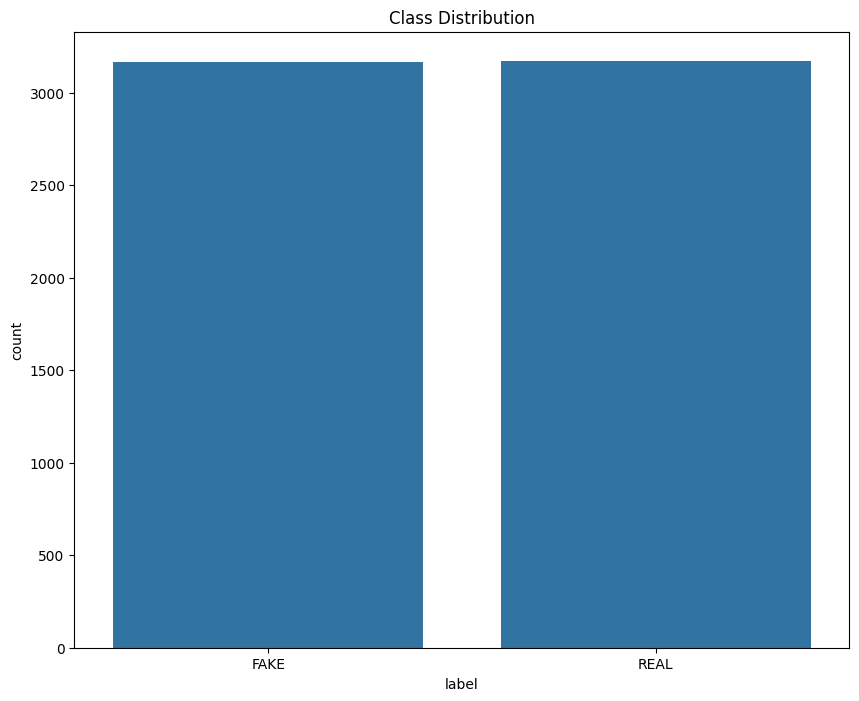

In [ ]:
# Visualizations
plt.figure(figsize=(10, 8))
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.show()

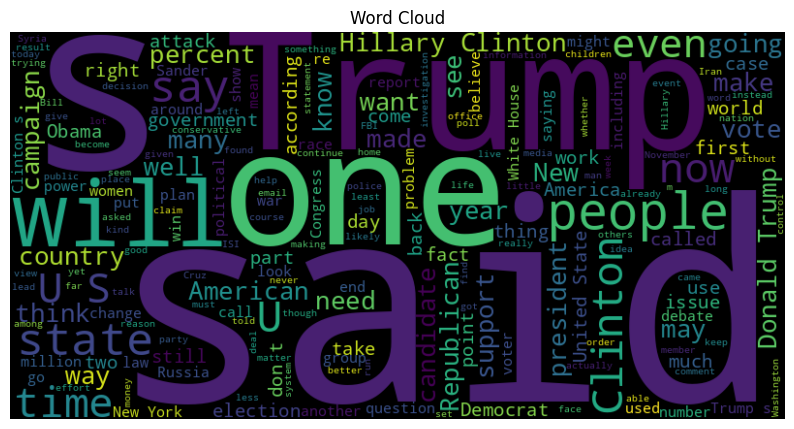

In [ ]:
wordcloud = WordCloud(width=800, height=400, random_state=42).generate(' '.join(df['text']))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


In [ ]:
print("Topic Modeling Results:")
for topic in lda.components_:
    print(' '.join([list(vectorizer.vocabulary_.keys())[i] for i in topic.argsort()[:-10 - 1:-1]]))

Topic Modeling Results:
asking develop prevented paris inequality op shaped accepted thereby good
gray health stuck schultz lesser be regulatory suspended management chelsea
jury anonymous injustice linked demand specifically cooperate tied scary user
buzzfeed jump scary user campaigning utm_content interested cultural social relying
poorly rigged series engaged research there reportedly paul for then
red workforce clash nearby globalism megyn poll intense clean later
insane pat emergency happened propaganda investigative defense represent buzzfeed heaven
love vow nightmare gov declare demand failure neutral reminder korean
research practice automatic explosive accepted cooperate concerning can dan latin
soul facebook reflected develop justification absurd whole weight npr authorization


In [ ]:
print("Actual Labels:", y_test)
print("Predicted Labels:", y_pred)

Actual Labels: 1357    FAKE
2080    FAKE
2718    FAKE
812     FAKE
4886    FAKE
        ... 
1512    FAKE
57      REAL
6092    REAL
3403    REAL
292     REAL
Name: label, Length: 1267, dtype: object
Predicted Labels: ['FAKE' 'FAKE' 'FAKE' ... 'FAKE' 'FAKE' 'FAKE']
